mAcc
    - timeseries data
    - Task에 따라 잘라서 활용
mActivity
mGps
    - 중요도 낮음
mAmbience : 소리 데이터(Speech) ...
    - 잠자는 시간 판단할 때?
mUsagestatus :
    - 특정 시간대에 앱을 사용했는지?
    - binary timeseries data(1/0)
mLight
wLight
wHr
wPedo
    - 걸음수 데이터

In [14]:
import os
import numpy as np
import pandas as pd
# 데이터 세트의 저장 위치 설정
challenge2024_dataset_path = '/workspace/jupyter_workspace/SHARED_FILES/docker_shared/'

challenge2024_val_path = os.path.join(challenge2024_dataset_path, 'val_dataset')
challenge2024_test_path = os.path.join(challenge2024_dataset_path, 'test_dataset')
challenge2024_train_path = os.path.join(challenge2024_dataset_path, 'train')


print("val dataset" + "="*20)
for file_name in os.listdir(challenge2024_val_path) :
     if file_name.startswith('ch2024_val') :
         print(file_name)

print("test dataset" + "="*20)
for file_name in os.listdir(challenge2024_test_path) :
     if file_name.startswith('ch2024_test') :
         print(file_name)

print("train dataset" + "="*20)
for file_name in os.listdir(challenge2024_train_path) :
    print(file_name)

val dataset====================
ch2024_val__m_acc_part_4.parquet.gzip
ch2024_val__m_acc_part_1.parquet.gzip
ch2024_val__m_light.parquet.gzip
ch2024_val__m_activity.parquet.gzip
ch2024_val__w_pedo.parquet.gzip
ch2024_val__w_heart_rate.parquet.gzip
ch2024_val__m_acc_part_3.parquet.gzip
ch2024_val__m_ambience.parquet.gzip
ch2024_val__m_gps.parquet.gzip
ch2024_val__w_light.parquet.gzip
ch2024_val__m_acc_part_2.parquet.gzip
ch2024_val__m_usage_stats.parquet.gzip
test dataset====================
ch2024_test_m_light.parquet.gzip
ch2024_test_w_light.parquet.gzip
ch2024_test_m_activity.parquet.gzip
ch2024_test__m_acc_part_6.parquet.gzip
ch2024_test_w_heart_rate.parquet.gzip
ch2024_test__m_acc_part_5.parquet.gzip
ch2024_test_m_gps.parquet.gzip
ch2024_test_m_usage_stats.parquet.gzip
ch2024_test_m_ambience.parquet.gzip
ch2024_test__m_acc_part_7.parquet.gzip
ch2024_test_w_pedo.parquet.gzip
ch2024_test__m_acc_part_8.parquet.gzip
train dataset====================
user29
user22
user24
user02
code
.ipy

In [33]:
file_name = 'ch2024_val__m_acc_part_1.parquet.gzip'
df_raw = pd.read_parquet(os.path.join(challenge2024_val_path, file_name))
df_raw.describe()

,subject_id,x,y,z
count,176781170.0,1.767812e+08,1.767812e+08,1.767812e+08
mean,1.0,6.787518e-01,-1.005569e+00,3.892497e+00
std,0.0,3.161303e+00,5.328794e+00,6.813766e+00
min,1.0,-1.506712e+02,-1.463145e+02,-1.565672e+02
25%,1.0,-4.331009e-01,-2.651248e+00,7.058827e-01
50%,1.0,9.332009e-02,-1.674976e-02,6.506085e+00
75%,1.0,1.095913e+00,6.771688e-01,9.791430e+00
max,1.0,1.440252e+02,1.525759e+02,1.567634e+02


In [13]:
df_raw['w_light'] = np.log1p(df_raw.m_light.values)
df_raw.describe()

,subject_id,m_light,w_light
count,14906.000000,14906.000000,14906.000000
mean,2.324433,126.800684,2.064849
std,1.228998,830.373506,2.483360
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,4.000000,125.000000,4.836282
max,4.000000,47639.000000,10.771428


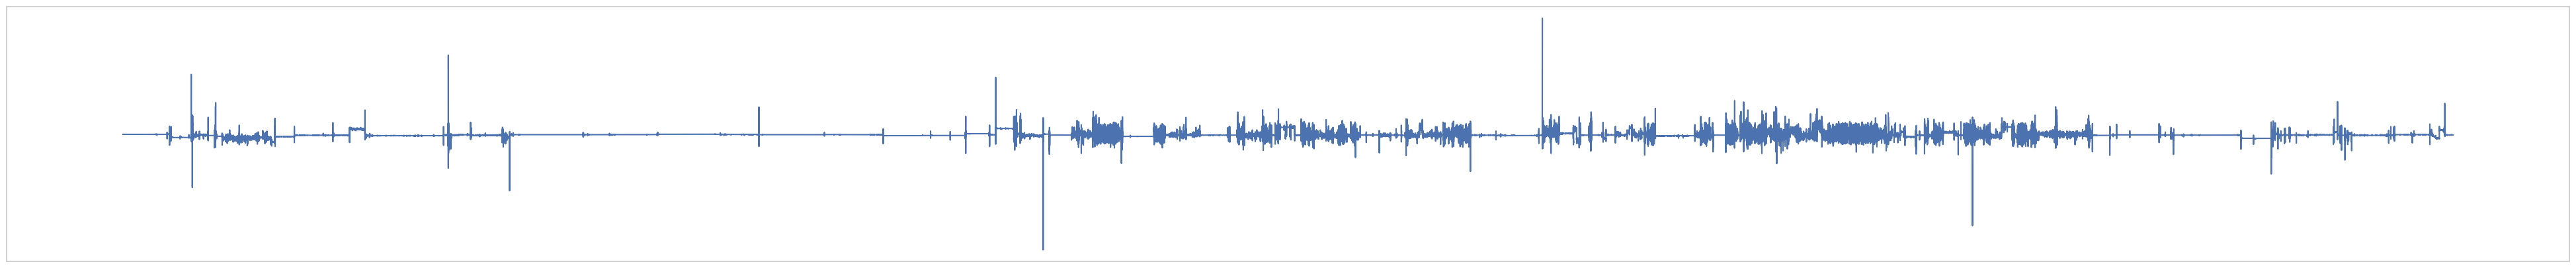

In [40]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(50,5))
bx = sns.lineplot(data = df__val.x.values)
bx.axes.xaxis.set_visible(False)
bx.axes.yaxis.set_visible(False)
plt.show()

In [34]:
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'])

In [35]:
def get_users_data(df, usernum) :
    out = df[df['subject_id'] == usernum]
    return out

def get_day_users_data(df, usernum, year, month, day) :
    if usernum :
        out = get_users_data(df, usernum).copy()
    else :
        out = df.copy()
    out['timestamp']= pd.to_datetime(out['timestamp'])
    out = out[(out['timestamp'].dt.year == year) & (out['timestamp'].dt.month == month) & (out['timestamp'].dt.day == day)]
    return out.reset_index(drop = True)


In [36]:
df__val = get_day_users_data(df_raw, 1,2023,8,20)

In [37]:
df__val

,subject_id,timestamp,x,y,z
0,1,2023-08-20 00:00:00.025,0.933201,-3.522235,9.164511
1,1,2023-08-20 00:00:00.043,0.947558,-3.522235,9.169296
2,1,2023-08-20 00:00:00.110,0.966700,-3.479164,9.164511
3,1,2023-08-20 00:00:00.131,0.947558,-3.522235,9.159725
4,1,2023-08-20 00:00:00.150,0.918844,-3.531806,9.159725
...,...,...,...,...,...
4563684,1,2023-08-20 23:59:59.924,0.215354,0.263211,9.810573
4563685,1,2023-08-20 23:59:59.942,0.224925,0.263211,9.820144
4563686,1,2023-08-20 23:59:59.961,0.215354,0.244068,9.805787
4563687,1,2023-08-20 23:59:59.980,0.239282,0.258425,9.829716


In [14]:
x1 = df__val.x.values

In [18]:
import matplotlib.pyplot as plt

def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.ylim([0, 20]); plt.show()

In [24]:
from scipy import signal

def calc_stft(nperseg):
    f, t, Zxx = signal.stft(x1, Fs, nperseg=nperseg)
    print(Zxx.shape)
    draw_stft(f, t, Zxx)

(251, 18175)


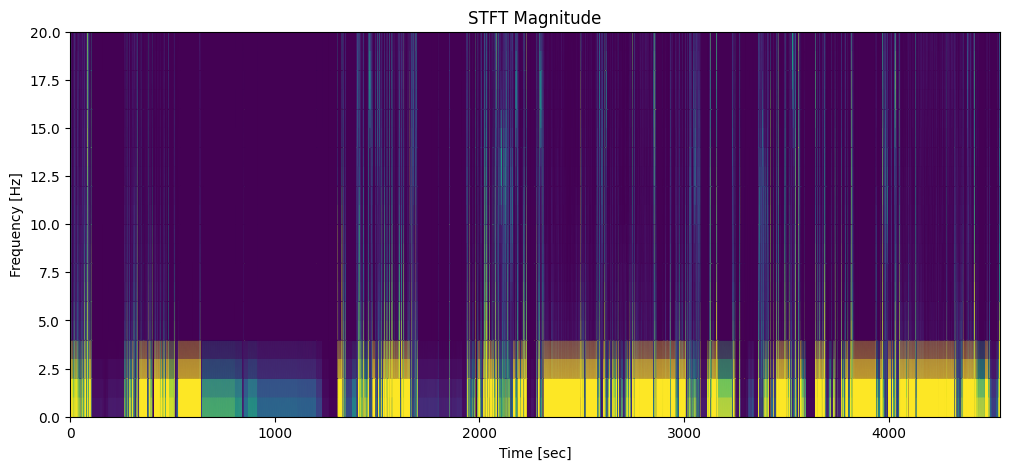

In [27]:
calc_stft(500)

In [13]:
s_fft.shape

(4543438,)

In [39]:

# data -> [numpy array]
def random_select_and_drop(data, num_to_drop) :
    drop_idx = np.random.choice(range(0,len(data)),num_to_drop,replace=False)
    data = np.delete(data, drop_idx)
    return data

def fill_na_random(data, num_to_fill, fill_type) :
    fill_idx = np.random.choice(range(0,len(data)), num_to_fill, replace=False)
    data_range = [np.min(data), np.max(data)]
    
    if fill_type == 'noise' :
        m = np.concatenate((np.ones(len(data),dtype=bool), np.zeros(num_to_fill, dtype=bool)))
        np.random.shuffle(m)
        out = np.empty(len(data)+num_to_fill, dtype = data.dtype)
        out[m] = data
        out[~m] = np.random.rand(num_to_fill) * data_range[1]
        return out
            
    elif fill_type == 'linear' :
        m = np.concatenate((np.ones(len(data),dtype=bool), np.zeros(num_to_fill, dtype=bool)))
        np.random.shuffle(m)
        out = np.empty(len(data)+num_to_fill, dtype = np.float32)
        out[m] = data
        out[~m] = np.NaN
        df_tmp = pd.DataFrame(out)
        df_tmp = df_tmp.interpolate(method='values')
        return df_tmp.to_numpy()
        
    elif fill_type == 'bfill' :
        m = np.concatenate((np.ones(len(data),dtype=bool), np.zeros(num_to_fill, dtype=bool)))
        np.random.shuffle(m)
        out = np.empty(len(data)+num_to_fill, dtype = np.float32)
        out[m] = data
        out[~m] = np.NaN
        df_tmp = pd.DataFrame(out)
        df_tmp.fillna(method='bfill', inplace=True)
        return df_tmp.to_numpy()
    else :
        return

<Axes: >

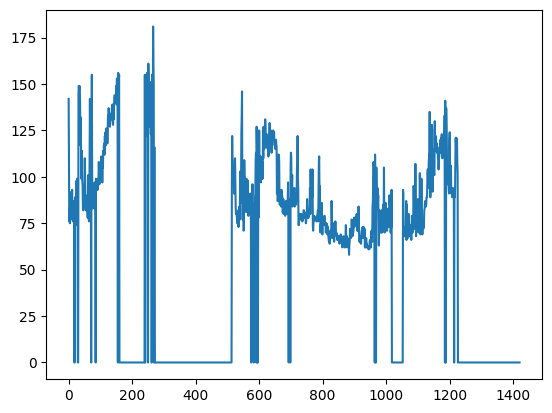

In [40]:
import seaborn as sns
sns.lineplot(data=df__val['heart_rate'].values)

In [41]:
import numpy as np
len(df__val['heart_rate'].values)

1421

In [50]:
fnr1 = fill_na_random(df__val['heart_rate'].values, 1000, 'linear')

<Axes: >

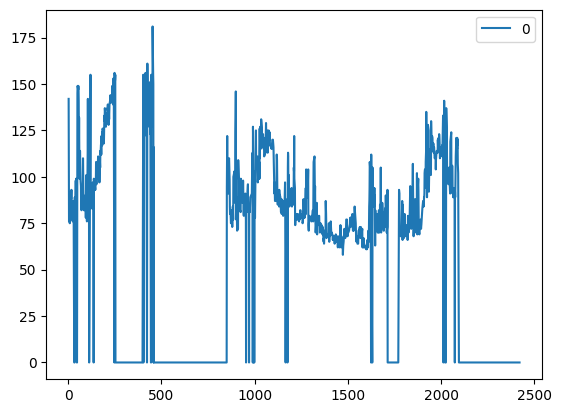

In [51]:
sns.lineplot(data=fnr1)

In [27]:
rsnd1 = random_select_and_drop(df__val['heart_rate'].values, 1000)

<Axes: >

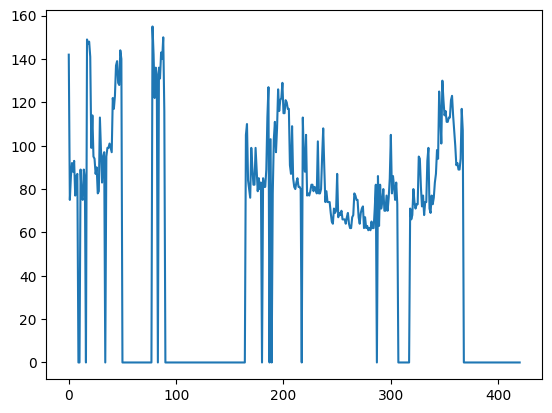

In [28]:
sns.lineplot(data=rsnd1)

In [53]:
val_label_path = os.path.join(challenge2024_dataset_path, 'val_label.csv')

In [54]:
val_label = pd.read_csv(val_label_path)

In [55]:
val_label

,subject_id,date,Q1,Q2,Q3,S1,S2,S3,S4
0,1,2023-08-20,1,1,1,0,0,0,0
1,1,2023-08-21,1,1,1,0,0,1,0
2,1,2023-08-22,0,1,1,0,1,1,0
3,1,2023-08-23,0,1,1,0,0,1,0
4,1,2023-08-24,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
100,4,2023-10-27,0,1,0,0,1,1,1
101,4,2023-10-28,1,1,0,1,1,1,1
102,4,2023-10-29,1,1,0,0,1,1,1
103,4,2023-10-30,0,1,0,0,0,1,1


In [107]:
int(val_label.iloc[2].Q1)

0

In [99]:

from datetime import datetime, timedelta
val_label['date'] = pd.to_datetime(val_label['date'])
lbl_date = val_label.iloc[2].date
date_start = lbl_date + timedelta(days=-1, hours=9) 
date_end = lbl_date + timedelta(hours=9)

print(date_start)
print(date_end)

2023-08-21 09:00:00
2023-08-22 09:00:00


In [95]:
df__val

,subject_id,timestamp,heart_rate
0,1,2023-08-20 00:00:44.572,0
1,1,2023-08-20 00:01:44.752,0
2,1,2023-08-20 00:02:44.919,0
3,1,2023-08-20 00:03:45.075,0
4,1,2023-08-20 00:04:45.248,0
...,...,...,...
56833,1,2023-09-29 23:55:32.625,104
56834,1,2023-09-29 23:56:32.984,0
56835,1,2023-09-29 23:57:33.159,0
56836,1,2023-09-29 23:58:33.335,0


In [85]:
df__val['timestamp'] = pd.to_datetime(df__val['timestamp'])

/tmp/ipykernel_791162/2512420733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df__val['timestamp'] = pd.to_datetime(df__val['timestamp'])


In [100]:
df_filered = df__val[df__val['timestamp'].between(date_start, date_end)]

In [101]:
df_filered

,subject_id,timestamp,heart_rate
1975,1,2023-08-21 09:00:45.627,0
1976,1,2023-08-21 09:01:45.976,0
1977,1,2023-08-21 09:02:46.144,0
1978,1,2023-08-21 09:03:46.322,0
1979,1,2023-08-21 09:04:46.507,0
...,...,...,...
3406,1,2023-08-22 08:55:11.621,0
3407,1,2023-08-22 08:56:11.758,0
3408,1,2023-08-22 08:57:11.893,0
3409,1,2023-08-22 08:58:12.020,0


<Axes: >

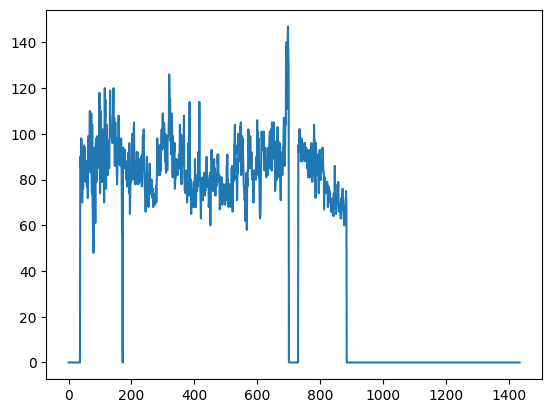

In [102]:
sns.lineplot(data = df_filered.heart_rate.values)

In [26]:
import torch.nn as nn
import torch

encoded_len = 256

class Conv2dEncoder(nn.Module) :
    def __init__(self, encoded_len, conv_window_size) :
        super().__init__()
        self.conv2dBlock = nn.Sequential(nn.Conv2d(1, encoded_len * 4, kernel_size=[1,conv_window_size], padding='same'),
                                         nn.BatchNorm2d(encoded_len*4),
                                         nn.GELU())
        self.conv2dBlock2 = nn.Sequential(nn.Conv2d(encoded_len * 4, encoded_len, kernel_size = [3,1], padding = 'valid'),
                                          nn.BatchNorm2d(encoded_len),
                                          nn.GELU())
        self.pooling = nn.AdaptiveAvgPool1d(1)        
    def forward(self, x) :
        x = x.unsqueeze(1) # (batch, 1 ,3, seq_len)
        x = self.conv2dBlock(x)  #(1, encoded_len * 4, 3, seq_len)
        x = self.conv2dBlock2(x).squeeze(2)# (1, encoded_len, 1, seq_len) -> (1, encoded_len, seq_len)
        x = self.pooling(x).squeeze(2)
        return x

model = Conv2dEncoder(encoded_len, 8)


In [27]:
from torchinfo import summary
summary(model, input_size = (1,3, 42000))

Layer (type:depth-idx)                   Output Shape              Param #
Conv2dEncoder                            [1, 256]                  --
├─Sequential: 1-1                        [1, 1024, 3, 42000]       --
│    └─Conv2d: 2-1                       [1, 1024, 3, 42000]       9,216
│    └─BatchNorm2d: 2-2                  [1, 1024, 3, 42000]       2,048
│    └─GELU: 2-3                         [1, 1024, 3, 42000]       --
├─Sequential: 1-2                        [1, 256, 1, 42000]        --
│    └─Conv2d: 2-4                       [1, 256, 1, 42000]        786,688
│    └─BatchNorm2d: 2-5                  [1, 256, 1, 42000]        512
│    └─GELU: 2-6                         [1, 256, 1, 42000]        --
├─AdaptiveAvgPool1d: 1-3                 [1, 256, 1]               --
Total params: 798,464
Trainable params: 798,464
Non-trainable params: 0
Total mult-adds (G): 34.20
Input size (MB): 0.50
Forward/backward pass size (MB): 2236.42
Params size (MB): 3.19
Estimated Total Size (MB): 2

In [159]:
convmodel = nn.Sequential(
        nn.Conv1d(2, encoded_len, kernel_size = 8),
        nn.BatchNorm1d(encoded_len),
        nn.GELU(),
        nn.Conv1d(encoded_len, encoded_len, kernel_size = 5),
        nn.BatchNorm1d(encoded_len),
        nn.GELU(),
        nn.Conv1d(encoded_len, encoded_len, kernel_size = 3),
        nn.BatchNorm1d(encoded_len),
        nn.GELU())

In [160]:
summary(convmodel, (1,2,1024))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 256, 1011]            --
├─Conv1d: 1-1                            [1, 256, 1017]            4,352
├─BatchNorm1d: 1-2                       [1, 256, 1017]            512
├─GELU: 1-3                              [1, 256, 1017]            --
├─Conv1d: 1-4                            [1, 256, 1013]            327,936
├─BatchNorm1d: 1-5                       [1, 256, 1013]            512
├─GELU: 1-6                              [1, 256, 1013]            --
├─Conv1d: 1-7                            [1, 256, 1011]            196,864
├─BatchNorm1d: 1-8                       [1, 256, 1011]            512
├─GELU: 1-9                              [1, 256, 1011]            --
Total params: 530,688
Trainable params: 530,688
Non-trainable params: 0
Total mult-adds (M): 535.66
Input size (MB): 0.01
Forward/backward pass size (MB): 12.46
Params size (MB): 2.12
Estimated Total Size (MB)